# Homework 1
Train a word2vec model using gensim. [This article](https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.YIc63H1KjUI) can provide a straightforward way for building a model simply with gensim.

After the model is built, take 20 words are random and plot them using ```tsnescatterplot()```. You can reuse the code we went through in class.

In [ ]:
#pip install gensim

### Reading Libraries

In [ ]:
import gensim 
from gensim.models import Word2Vec
from time import time 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import random

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Getting data

In [ ]:
!wget https://storage.googleapis.com/nicksdemobucket/shakespeare.txt

--2022-05-06 17:39:47--  https://storage.googleapis.com/nicksdemobucket/shakespeare.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 74.125.142.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2022-05-06 17:39:47 (41.6 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]



In [ ]:
with open('shakespeare.txt', 'r') as file:
    shakespeare_text = file.read().replace('\n', ' ')

In [ ]:
print(shakespeare_text[:150])

First Citizen: Before we proceed any further, hear me speak.  All: Speak, speak.  First Citizen: You are all resolved rather to die than to famish?  A


### Pre-processing data

- replacing colons and comma.
- splitting string into list based on full stop.
- Converting list to list of lists which is expected input for Word2Vec.

In [ ]:
type(shakespeare_text)

str

In [ ]:
shakespeare_text = shakespeare_text.replace(':', '')
shakespeare_text = shakespeare_text.replace(',', '')

In [ ]:
sent_list = shakespeare_text.split(". ")
sent_list[:2]

['First Citizen Before we proceed any further hear me speak',
 ' All Speak speak']

In [ ]:
#Converting to list of lists
def list_of_list(lst):
    return [gensim.utils.simple_preprocess(el) for el in lst]
                  
final_list = list_of_list(sent_list)
final_list[:2]

[['first',
  'citizen',
  'before',
  'we',
  'proceed',
  'any',
  'further',
  'hear',
  'me',
  'speak'],
 ['all', 'speak', 'speak']]

### Building gensim Word2Vec model

In [ ]:
t = time()
model = Word2Vec(final_list, min_count=1,size= 75,workers=3, window = 5, iter = 10)
model.train(final_list,total_examples=len(final_list),epochs=10)
print('Time to build and train model: {} mins'.format(round((time() - t) / 60, 2)))

Time to build and train model: 0.28 mins


In [ ]:
model.init_sims(replace=True)

- Running some basic functions to test the model built.

In [ ]:
model.wv.most_similar(positive=["love"])

[('heart', 0.7490205764770508),
 ('yours', 0.7232699990272522),
 ('hate', 0.7219093441963196),
 ('sin', 0.7072398066520691),
 ('sprung', 0.6688291430473328),
 ('burden', 0.6571119427680969),
 ('derivative', 0.653865396976471),
 ('weep', 0.652944028377533),
 ('true', 0.6495804786682129),
 ('tender', 0.647277295589447)]

In [ ]:
model.wv.most_similar(positive=["speak"])

[('hear', 0.8253228664398193),
 ('ask', 0.806902289390564),
 ('think', 0.7974578738212585),
 ('remember', 0.7859883904457092),
 ('swear', 0.7692616581916809),
 ('read', 0.7660251259803772),
 ('talk', 0.7552900314331055),
 ('offend', 0.7504479289054871),
 ('weep', 0.7471891641616821),
 ('trust', 0.736169695854187)]

In [ ]:
model.wv.doesnt_match(["book", "paper", "light"])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'light'

In [ ]:
model.wv.similarity("speak", 'talk')

0.75529003

In [ ]:
model.wv.similarity("speak", 'ready')

0.13896327

### All words

- First we get a list of all words in the input.
- Then we find unique words in this list.
- We shuffle the list of unique words and then choose top 20 for plotting.

In [ ]:
all_words = []

for word_list in final_list:
  for word in word_list:
    all_words.append(word)

In [ ]:
unique_words = list(dict.fromkeys(all_words))

In [ ]:
random.shuffle(unique_words)
plot_words = unique_words[:20]
plot_words

['inly',
 'upbraidings',
 'or',
 'calmness',
 'storehouse',
 'maids',
 'rigour',
 'dart',
 'manifests',
 'room',
 'exactly',
 'elbow',
 'socrates',
 'marches',
 'procured',
 'supportance',
 'quart',
 'bended',
 'invectives',
 'meacock']

### Plotting words with TSNE

- TSNE function modified to plot only the 20 words we choose to send to function.

In [ ]:
def tsnescatterplot(model, list_names): #word
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """

    word_labels = []
    color_list = []

    arrays = np.empty((0, 75), dtype='f')
    #word_labels = [word]
    #color_list  = ['red']

    # adds the vector of the query word
    #arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    #close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
   # for wrd_score in close_words:
    #    wrd_vector = model.wv.__getitem__([wrd_score[0]])
     #   word_labels.append(wrd_score[0])
      #  color_list.append('blue')
       # arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


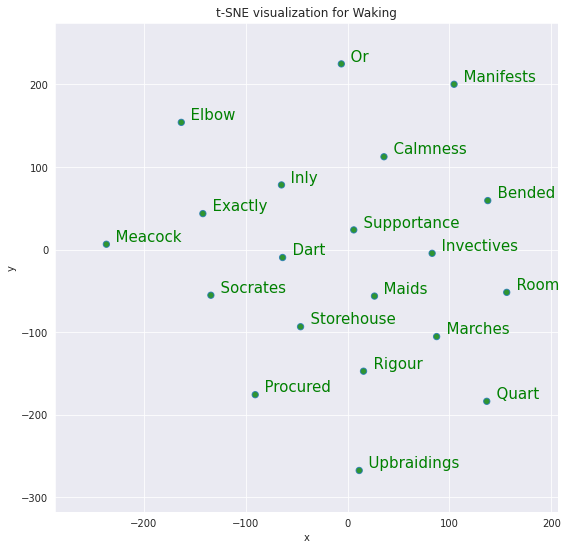

In [ ]:
tsnescatterplot(model, plot_words)